In [4]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

## remove to hide computer path
import warnings
warnings.filterwarnings('ignore')

#### Set 1

In [5]:
df_1 = pd.read_excel("./data-table-B5.XLS");
df_1 = df_1.sample(n=20) 

cols = ['x1','x6']
results = smf.ols('y ~ x6 +x1', data=df_1).fit();
x6 = 0.0162
x1 = -0.1962
intercept = 13.1328
# equation = y = 13.1328 + b6*x6 + b1*x1

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


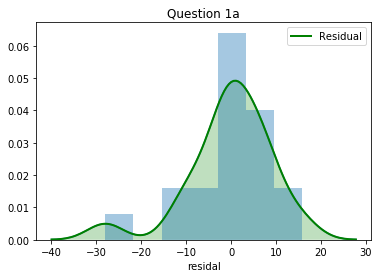

In [6]:
df_1['yhat'] = df_1.apply(lambda x: intercept + x6*x['x6'] + x1*x['x1'], axis=1)
df_1['residal'] = df_1['yhat']-df_1['y']

sns.distplot(df_1['residal'], kde=True)
sns.distplot(df_1['residal'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Residual", color ="green")

plt.title("Question 1a")
plt.show()

Problem seems like it is not a normal distribution.

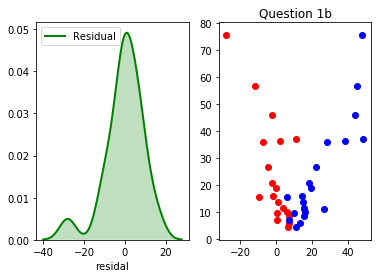

In [7]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(df_1['residal'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Residual", color ="green", ax = ax[0]) 

plt.scatter(df_1['residal'], df_1['y'], color="red")
plt.scatter(df_1['yhat'], df_1['y'], color="blue")

plt.title("Question 1b")
plt.show()

c + d) Residual Calculations

In [8]:
infl = results.get_influence()
frame_infl = infl.summary_frame()

df_1residual = pd.DataFrame()
df_1residual['student_resid'] = frame_infl['student_resid']
df_1residual['standard_resid'] = frame_infl['standard_resid']
df_1residual['resid_press'] = infl.resid_press
df_1residual['cooks_d'] = frame_infl['cooks_d']
df_1residual['r_student'] = -frame_infl['hat_diag']* infl.resid_press
df_1residual

,student_resid,standard_resid,resid_press,cooks_d,r_student
13,-0.422649,-0.433245,-4.217017,0.013022,0.726467
20,-0.117310,-0.120869,-1.116052,0.000425,0.089511
10,0.907944,0.912671,8.580399,0.035284,-0.967442
9,0.624881,0.636394,6.283624,0.032830,-1.229172
7,-0.622252,-0.633780,-5.839636,0.011058,0.445479
2,-0.338974,-0.348159,-3.220785,0.003688,0.269400
4,-0.568460,-0.580126,-5.457015,0.014395,0.620618
11,0.708545,0.719157,6.700305,0.018430,-0.647106
15,0.455911,0.466919,4.299572,0.005906,-0.323169
6,0.399357,0.409611,3.828351,0.006370,-0.391469


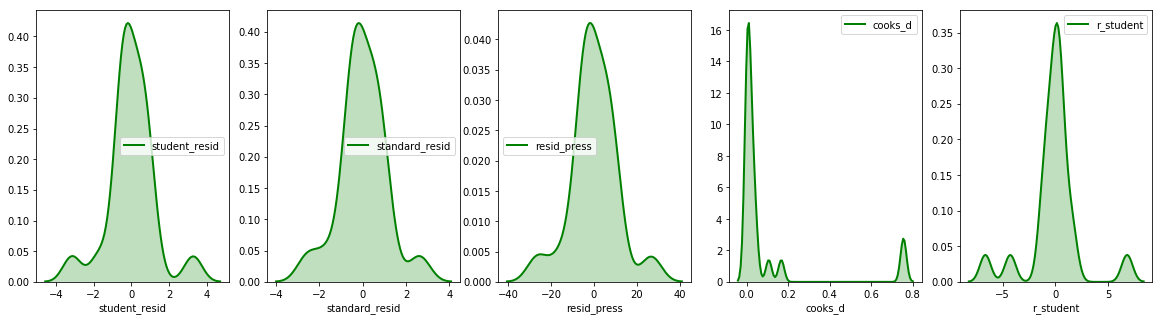

In [9]:
plot_this = ['student_resid', 'standard_resid', 'resid_press','cooks_d','r_student']

fig, ax = plt.subplots(1, 5,figsize=(20,5))

for i, p in enumerate(plot_this):
    sns.distplot(df_1residual[p], hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = p, color ="green", ax = ax[i]) 
plt.show()

PRESS  and R student transformation seems to be suitable in this case.

#### Set 2

In [10]:
df_2 = pd.read_excel("./data-table-B4.XLS");
df_2 = df_2.sample(n=15) 

results2 = smf.ols('y ~ x4 +x7+x9', data=df_2).fit();
print (results2.params)
intercept2 = results2.params[0]
x4 = results2.params[1]
x7 = results2.params[2]
x9 = results2.params[3]

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Intercept    16.882041
x4           15.471097
x7           -1.855710
x9            3.569190
dtype: float64


In [11]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     4.200
Date:                Wed, 25 Nov 2020   Prob (F-statistic):             0.0330
Time:                        14:36:58   Log-Likelihood:                -40.981
No. Observations:                  15   AIC:                             89.96
Df Residuals:                      11   BIC:                             92.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.8820      6.284      2.686      0.021       3.051      30.713
x4            15.4711      6.216      2.489      0.030       1.790      29.152
x7            -1.8557      2.744     -0.676      0.513      -7.895       4.183
x9             3.5692      2.389      1.494      0.163      -1.689       8.828
==============================================================================
Omnibus:                        0.613   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.650
Skew:                           0.320   Prob(JB):                        0.723
Kurtosis:                       2.206   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

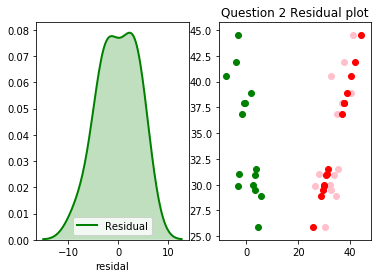

In [12]:
df_2['yhat'] = df_2.apply(lambda x: intercept2 + x4*x['x4']+x7*x['x7']+x9*x['x9'], axis=1)
df_2['residal'] = df_2['yhat']-df_2['y']

fig, ax = plt.subplots(1, 2) 
sns.distplot(df_2['residal'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Residual", color ="green", ax = ax[0]) 

plt.scatter(df_2['residal'], df_2['y'], color="green")
plt.scatter(df_2['yhat'], df_2['y'], color="pink")
plt.scatter(df_2['y'], df_2['y'], color="red")
plt.title("Question 2 Residual plot")

plt.show()

In [13]:
infl2 = results2.get_influence()
frame_infl2 = infl2.summary_frame()

df_2residual = pd.DataFrame()
df_2residual['student_resid'] = frame_infl2['student_resid']
df_2residual['standard_resid'] = frame_infl2['standard_resid']
df_2residual['resid_press'] = infl2.resid_press
df_2residual['cooks_d'] = frame_infl2['cooks_d']
df_2residual['r_student'] = -frame_infl2['hat_diag']* infl2.resid_press
df_2residual

,student_resid,standard_resid,resid_press,cooks_d,r_student
8,-0.959462,-0.962945,-4.568064,0.044958,0.742010
5,-0.837538,-0.849140,-4.289605,0.063799,1.121344
9,0.753560,0.768813,4.058540,0.070706,-1.313481
4,0.994611,0.995098,5.656451,0.176819,-2.356806
17,0.115195,0.120738,0.625988,0.001553,-0.187053
6,-1.464120,-1.393473,-6.492718,0.073689,0.855691
14,2.243728,1.919220,8.791738,0.104352,-0.894879
19,0.261894,0.273740,1.375478,0.006361,-0.348641
11,-0.774219,-0.788713,-4.652228,0.131549,2.131898
18,0.924840,0.930983,4.929269,0.105592,-1.615056


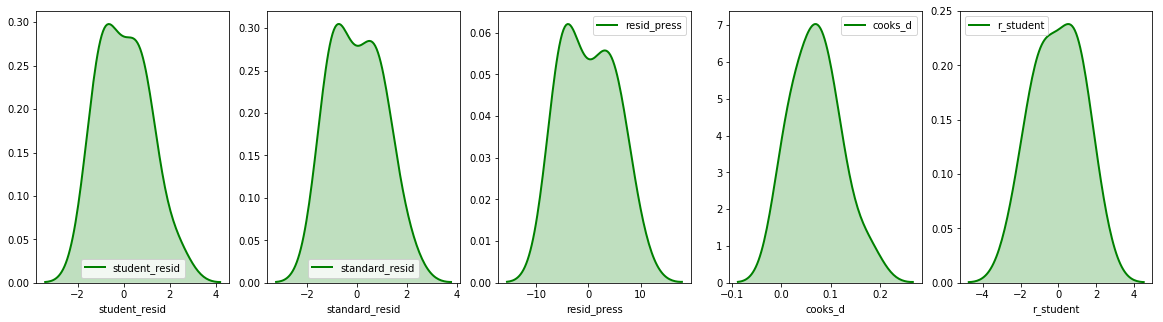

In [14]:
plot_this = ['student_resid', 'standard_resid', 'resid_press','cooks_d','r_student']

fig, ax = plt.subplots(1, 5,figsize=(20,5))

for i, p in enumerate(plot_this):
    sns.distplot(df_2residual[p], hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = p, color ="green", ax = ax[i]) 
plt.show()

c) Can a LOF be constructed?

Yes, the lack of fit test requires replicate observatinos of y for at least one x (p.156). We can see there are replicates of y for at least one x.

In [15]:
df_2

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,yhat,residal
8,31.5,5.3003,1.0,4.9883,1.552,1.0,6,3,30,0,35.326053,3.826053
5,30.9,5.8980,1.0,5.8500,1.240,1.0,7,3,51,1,34.068261,3.168261
9,31.0,6.2712,1.0,5.5200,0.975,1.0,5,2,30,0,28.254940,-2.745060
4,29.9,3.8910,1.0,4.4550,0.988,1.0,6,3,56,0,26.600355,-3.299645
17,37.9,7.5422,1.5,5.0000,1.690,1.0,6,3,22,0,37.461065,-0.438935
6,28.9,5.6039,1.0,9.5200,1.501,0.0,6,3,32,0,34.537027,5.637027
14,40.5,7.7841,1.5,7.1020,1.376,1.0,6,3,17,0,32.603140,-7.896860
19,37.9,6.0831,1.5,6.7265,1.652,1.0,6,3,44,0,36.873163,-1.026837
11,30.0,5.0500,1.0,5.0000,1.020,0.0,5,2,46,1,32.520329,2.520329
18,44.5,8.7951,1.5,9.8900,1.820,2.0,8,4,50,1,41.185787,-3.314213


#### Set 3

In [24]:
df_3 = pd.read_excel("./data-prob-5-5.XLS")
df_3 = df_3.sample(n=7)
results3 = smf.ols('defects ~ weeks', data=df_3).fit();
results3.params

Intercept   -26.375939
weeks         6.494953
dtype: float64

In [25]:
intercept3 = results3.params[0]
weeks = results3.params[1]

In [26]:
def graph_me(d, transformation_type=None):
    fig, ax = plt.subplots(1, 2) 

    if transformation_type:
        d['weeks'] = eval(transformation_type+"(d['weeks'])")
    d['yhat'] = d.apply(lambda x: intercept3 + weeks*x['weeks'], axis=1)
    d['residal'] = d['yhat']-d['defects']
    plt.scatter(d['defects'], d['defects'], color="red")
    plt.scatter(d['yhat'], d['defects'], color="blue")
    plt.scatter(d['residal'], d['defects'], color="green")
    
    sns.distplot(d['residal'], hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Transformed", color ="green", ax = ax[0]) 
    
    plt.show()
    return d

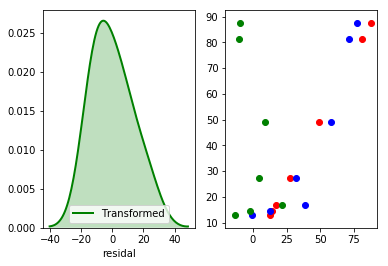

,defects,weeks,yhat,residal
0,13.0,4,-0.396127,-13.396127
2,14.5,6,12.593779,-1.906221
11,81.2,15,71.048357,-10.151643
6,16.8,10,38.573592,21.773592
5,27.4,9,32.078638,4.678638
12,87.4,16,77.543310,-9.856690
9,49.2,13,58.058451,8.858451


In [27]:
graph_me(df_3) 

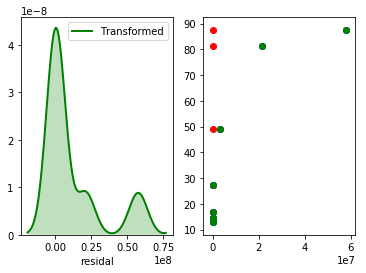

,defects,weeks,yhat,residal
0,13.0,5.459815e+01,3.282365e+02,3.152365e+02
2,14.5,4.034288e+02,2.593875e+03,2.579375e+03
11,81.2,3.269017e+06,2.123209e+07,2.123201e+07
6,16.8,2.202647e+04,1.430345e+05,1.430177e+05
5,27.4,8.103084e+03,5.260277e+04,5.257537e+04
12,87.4,8.886111e+06,5.771484e+07,5.771476e+07
9,49.2,4.424134e+05,2.873428e+06,2.873379e+06


In [28]:
graph_me(df_3, "np.exp")

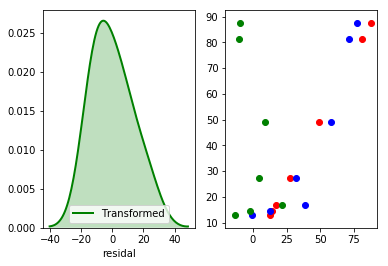

,defects,weeks,yhat,residal
0,13.0,4.0,-0.396127,-13.396127
2,14.5,6.0,12.593779,-1.906221
11,81.2,15.0,71.048357,-10.151643
6,16.8,10.0,38.573592,21.773592
5,27.4,9.0,32.078638,4.678638
12,87.4,16.0,77.543310,-9.856690
9,49.2,13.0,58.058451,8.858451


In [29]:
graph_me(df_3, "np.log") #ln

In [30]:
from scipy import stats 
fitted_data, fitted_lambda = stats.boxcox(df_3['weeks']) 

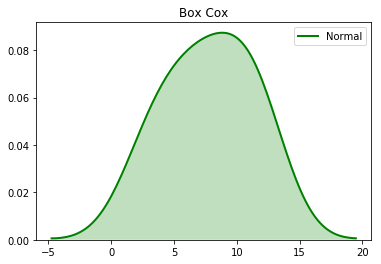

In [31]:
fig, ax = plt.subplots(1) 
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green") 
plt.title('Box Cox')
plt.show()

a) The residuals are not linear. <br>
b) Taking box cox works and log transformation works